In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

katsuura jp
byron bay au
saskylakh ru
peniche pt
roald no
margate za
shimoda jp
punta arenas cl
port elizabeth za
albany au
ribeira grande pt
walvis bay na
bredasdorp za
hobart au
las vegas us
tiksi ru
nome us
butaritari ki
abbeville us
chuy uy
butaritari ki
bardiyah ly
upernavik gl
narok ke
ciudad guayana ve
taolanaro mg
puerto ayora ec
bomet ke
mataura pf
kaitangata nz
goure ne
bredasdorp za
cherskiy ru
inhambane mz
oistins bb
hovd mn
baruun-urt mn
olafsvik is
tahta eg
busselton au
thompson ca
hobart au
necochea ar
sillamae ee
knysna za
tautira pf
gorno-chuyskiy ru
punta arenas cl
bluff nz
punta arenas cl
mataura pf
palafrugell es
saint-pierre pm
kavaratti in
inhambane mz
pangnirtung ca
shelburne ca
college us
maragogi br
albany au
albany au
ambilobe mg
amderma ru
talnakh ru
hermanus za
nerchinskiy zavod ru
lebu cl
ahar ir
yellowknife ca
vila franca do campo pt
vicuna cl
taolanaro mg
zhanakorgan kz
pevek ru
mataura pf
sobolevo ru
saint george bm
kapaa us
hofn is
pemba mz
taolanaro mg

sovetskoye ru
tallahassee us
kapaa us
mataura pf
kamsack ca
mataura pf
boa vista br
atuona pf
lorengau pg
tuatapere nz
krnov cz
rikitea pf
castro cl
aklavik ca
itarema br
lebu cl
rikitea pf
sampit id
rocha uy
urumqi cn
andenes no
kapaa us
punta arenas cl
tulun ru
senneterre ca
vaini to
castro cl
vaini to
dikson ru
rikitea pf
aklavik ca
farafangana mg
kavieng pg
kahului us
nexo dk
omboue ga
new norfolk au
asau tv
hasaki jp
bonavista ca
esperance au
butaritari ki
tsihombe mg
mahebourg mu
estelle us
saint george bm
liverpool ca
vaini to
kapaa us
taihe cn
mys shmidta ru
tsihombe mg
tenenkou ml
benghazi ly
busselton au
ostrovnoy ru
bluff nz
turukhansk ru
juazeiro br
busselton au
hithadhoo mv
codrington ag
aklavik ca
hithadhoo mv
sembe cg
port elizabeth za
severo-kurilsk ru
kodinsk ru
nikolskoye ru
cockburn town tc
carutapera br
attawapiskat ca
mataura pf
broken hill au
iki-burul ru
roswell us
allonnes fr
ushuaia ar
busselton au
krasnoarmeysk ru
tuatapere nz
malwan in
airai pw
polis cy
senty

barentsburg sj
lebu cl
grand centre ca
fortuna us
kaitangata nz
arraial do cabo br
yellowknife ca
port lincoln au
saldanha za
ushuaia ar
bredasdorp za
butaritari ki
khatanga ru
cherskiy ru
kirakira sb
san cristobal ec
nikolskoye ru
mar del plata ar
samarai pg
kavieng pg
tezu in
kannur in
libreville ga
bredasdorp za
busselton au
mar del plata ar
mataura pf
rikitea pf
belushya guba ru
yellowknife ca
outlook ca
rikitea pf
rawson ar
illoqqortoormiut gl
carnarvon au
kapaa us
mar del plata ar
nyurba ru
grand river south east mu
santa maria do suacui br
leningradskiy ru
coruripe br
magadan ru
busselton au
busselton au
roald no
rikitea pf
los llanos de aridane es
husavik is
chapais ca
rikitea pf
rikitea pf
rikitea pf
sabha ly
punta arenas cl
kapaa us
galgani sd
itaituba br
nizhniy odes ru
port alfred za
atuona pf
mahebourg mu
ostrovnoy ru
east london za
beringovskiy ru
bluff nz
qaanaaq gl
saint-philippe re
clyde river ca
korla cn
roald no
busselton au
qostanay kz
rio gallegos ar
bluff nz
matau

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [9]:
import requests
requests.__version__

'2.27.1'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | byron bay
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | peniche
Processing Record 5 of Set 1 | roald
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | shimoda
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | las vegas
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | abbeville
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | bardiyah
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | narok
Pro

Processing Record 40 of Set 4 | arman
Processing Record 41 of Set 4 | north bend
Processing Record 42 of Set 4 | zyryanka
Processing Record 43 of Set 4 | mehran
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | satipo
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | qaqortoq
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | caravelas
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | taldan
Processing Record 7 of Set 5 | ossora
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | kawalu
Processing Record 12 of Set 5 | egvekinot
Processin

Processing Record 28 of Set 8 | tallahassee
Processing Record 29 of Set 8 | boa vista
Processing Record 30 of Set 8 | krnov
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | sampit
Processing Record 33 of Set 8 | rocha
Processing Record 34 of Set 8 | urumqi
Processing Record 35 of Set 8 | andenes
Processing Record 36 of Set 8 | tulun
Processing Record 37 of Set 8 | senneterre
Processing Record 38 of Set 8 | farafangana
Processing Record 39 of Set 8 | nexo
Processing Record 40 of Set 8 | omboue
Processing Record 41 of Set 8 | asau
Processing Record 42 of Set 8 | bonavista
Processing Record 43 of Set 8 | estelle
Processing Record 44 of Set 8 | liverpool
Processing Record 45 of Set 8 | taihe
Processing Record 46 of Set 8 | tenenkou
Processing Record 47 of Set 8 | benghazi
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | turukhansk
Processing Record 50 of Set 8 | juazeiro
Processing Record 1 of Set 9 | sembe
Processing Record 2 of Set 9 | kodi

Processing Record 16 of Set 12 | paita
Processing Record 17 of Set 12 | anloga
Processing Record 18 of Set 12 | aquidauana
Processing Record 19 of Set 12 | te anau
Processing Record 20 of Set 12 | trairi
Processing Record 21 of Set 12 | iskateley
Processing Record 22 of Set 12 | handwara
City not found. Skipping...
Processing Record 23 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 24 of Set 12 | pisco
Processing Record 25 of Set 12 | khasan
Processing Record 26 of Set 12 | la ronge
Processing Record 27 of Set 12 | asfi
Processing Record 28 of Set 12 | esso
Processing Record 29 of Set 12 | mahon
Processing Record 30 of Set 12 | grand centre
City not found. Skipping...
Processing Record 31 of Set 12 | port lincoln
Processing Record 32 of Set 12 | kirakira
Processing Record 33 of Set 12 | san cristobal
Processing Record 34 of Set 12 | tezu
Processing Record 35 of Set 12 | kannur
Processing Record 36 of Set 12 | libreville
Processing Record 37 of Set 12 | outlo

In [14]:
len(city_data)

548

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,35.71,54,22,10.65,JP,2022-02-02 20:23:14
1,Byron Bay,-28.6500,153.6167,77.05,94,97,9.93,AU,2022-02-02 20:28:01
2,Saskylakh,71.9167,114.0833,-29.81,100,28,2.80,RU,2022-02-02 20:26:23
3,Peniche,39.3558,-9.3811,58.48,80,97,8.57,PT,2022-02-02 20:23:05
4,Roald,62.5833,6.1333,33.94,64,40,10.36,NO,2022-02-02 20:26:14
5,Margate,51.3813,1.3862,48.69,81,100,3.00,GB,2022-02-02 20:26:27
6,Shimoda,34.6667,138.9500,39.11,61,18,22.84,JP,2022-02-02 20:28:02
7,Punta Arenas,-53.1500,-70.9167,51.82,87,75,10.36,CL,2022-02-02 20:20:22
8,Port Elizabeth,-33.9180,25.5701,72.10,94,75,10.36,ZA,2022-02-02 20:21:35
9,Albany,42.6001,-73.9662,45.73,72,89,3.00,US,2022-02-02 20:26:49


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2022-02-02 20:23:14,35.1333,140.3000,35.71,54,22,10.65
1,Byron Bay,AU,2022-02-02 20:28:01,-28.6500,153.6167,77.05,94,97,9.93
2,Saskylakh,RU,2022-02-02 20:26:23,71.9167,114.0833,-29.81,100,28,2.80
3,Peniche,PT,2022-02-02 20:23:05,39.3558,-9.3811,58.48,80,97,8.57
4,Roald,NO,2022-02-02 20:26:14,62.5833,6.1333,33.94,64,40,10.36


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

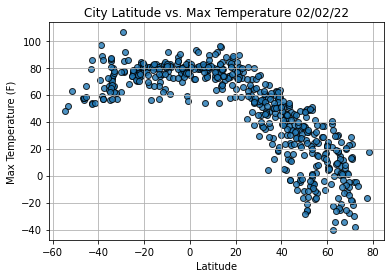

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

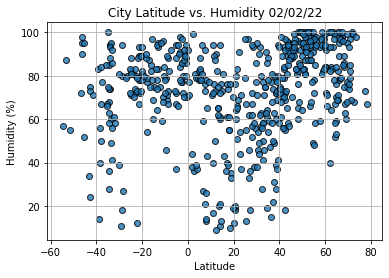

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

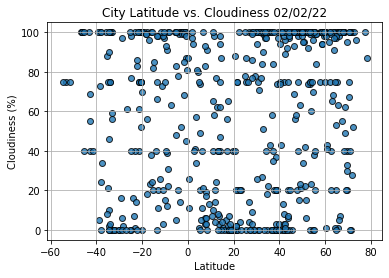

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

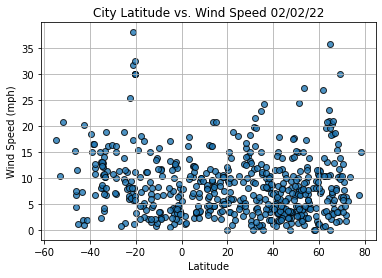

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()